In [ ]:
!nvidia-smi

Sun Dec 13 15:40:46 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.45.01    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    41W / 300W |   2911MiB / 16130MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
import numpy as np
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

from glob import glob

## 이미지 불러오기

In [ ]:
# 이미지 경로 glob로 가져오기
img_paths = '/content/drive/Shareddrives/GOFOODA/data/test_image/target/*_*/*'
test_img_paths = glob(img_paths)
test_img_paths[:3], len(test_img_paths)

(['/content/drive/Shareddrives/GOFOODA/data/test_image/target/간장게장_0/간장게장_1.jpg',
  '/content/drive/Shareddrives/GOFOODA/data/test_image/target/간장게장_0/간장게장_2.jpg',
  '/content/drive/Shareddrives/GOFOODA/data/test_image/target/간장게장_0/간장게장_3.jpg'],
 2483)

In [ ]:
# 이미지 읽어들이기, 라벨 값 리턴
def load_image(path, IMG_SIZE) :
    img = tf.io.read_file(path)
    img = tf.image.decode_image(img, channels=3, expand_animations=False)
    img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))

    label = int(path.split('/')[-2].split('_')[-1])
    return img, label

72


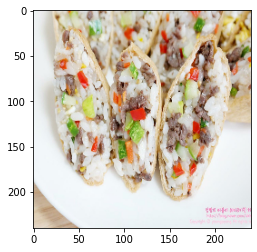

In [ ]:
cccc, llll = load_image(test_img_paths[np.random.randint(len(test_img_paths))], 240)
print(llll)
plt.imshow(np.int32(cccc))
plt.show()

## 저장해둔 모델 가져오기

#### 먼저 모델들이 저장되어있는 경로들을 ```models_dirs```에 담는다

In [ ]:
models_dir = '/content/drive/Shareddrives/GOFOODA/data/models'
models_dirs = glob(os.path.join(models_dir, '*'))
models_dirs

['/content/drive/Shareddrives/GOFOODA/data/models/DCGAN_checkpoint',
 '/content/drive/Shareddrives/GOFOODA/data/models/NASNetMobile_checkpoint',
 '/content/drive/Shareddrives/GOFOODA/data/models/MobileNet_checkpoint',
 '/content/drive/Shareddrives/GOFOODA/data/models/MobileNetV2_checkpoint',
 '/content/drive/Shareddrives/GOFOODA/data/models/DenseNet121_checkpoint',
 '/content/drive/Shareddrives/GOFOODA/data/models/EfficientNetB0_checkpoint',
 '/content/drive/Shareddrives/GOFOODA/data/models/Xception_checkpoint',
 '/content/drive/Shareddrives/GOFOODA/data/models/ResNet50_checkpoint',
 '/content/drive/Shareddrives/GOFOODA/data/models/InceptionV3_checkpoint',
 '/content/drive/Shareddrives/GOFOODA/data/models/VGG16_checkpoint',
 '/content/drive/Shareddrives/GOFOODA/data/models/EfficientNetB1_checkpoint',
 '/content/drive/Shareddrives/GOFOODA/data/models/EfficientNetB0_aug_checkpoint',
 '/content/drive/Shareddrives/GOFOODA/data/models/EfficientNetB0_alb_checkpoint',
 '/content/drive/Sharedd

#### 학습시킨 모델들에 대한 리스트(```model_lst```)를 생성, 이후에 선택해서 사용할 수 있게끔 활용

In [ ]:
model_lst = os.listdir(models_dir)
model_lst = [x for x in model_lst if 'ipynb' not in x]
model_lst = list(map(lambda x : '_'.join(x.split('/')[-1].split('_')[:-1]), model_lst))
model_lst

['DCGAN',
 'NASNetMobile',
 'MobileNet',
 'MobileNetV2',
 'DenseNet121',
 'EfficientNetB0',
 'Xception',
 'ResNet50',
 'InceptionV3',
 'VGG16',
 'EfficientNetB1',
 'EfficientNetB0_aug',
 'EfficientNetB0_alb',
 'VGG19',
 'EfficientNetB2',
 'EfficientNetB3',
 'EfficientNetB4',
 'EfficientNetB0_food101',
 'FinalModel']

In [ ]:
models = {}
for idx, m in enumerate(model_lst) :
    models[idx] = m

models

{0: 'DCGAN',
 1: 'NASNetMobile',
 2: 'MobileNet',
 3: 'MobileNetV2',
 4: 'DenseNet121',
 5: 'EfficientNetB0',
 6: 'Xception',
 7: 'ResNet50',
 8: 'InceptionV3',
 9: 'VGG16',
 10: 'EfficientNetB1',
 11: 'EfficientNetB0_aug',
 12: 'EfficientNetB0_alb',
 13: 'VGG19',
 14: 'EfficientNetB2',
 15: 'EfficientNetB3',
 16: 'EfficientNetB4',
 17: 'EfficientNetB0_food101',
 18: 'FinalModel'}

In [ ]:
def load_model() :
    global models_dirs
    global models

    print(f'사용가능한 모델\n')
    for key, value in models.items() :
        print(f'{key}\t : {value}')
        
    model_num = int(input('사용할 모델의 번호 입력 : '))
    model_name = models[model_num]

    for models_dir in models_dirs:
        
        check_dir = os.path.join('/content/drive/Shareddrives/GOFOODA/data/models', model_name+'_checkpoint')
        # print(f'check_dir={check_dir}, models_dir={models_dir}, flag = {model_name == models_dir}')
        if check_dir == models_dir :
            target = check_dir
            break   # 추가
    
    trained_models = glob(os.path.join(target, '*-*-*.h5'))
    trained_models = sorted(trained_models, key=lambda x : os.path.basename(x).split('-')[-1], reverse=True)  # 정확도 기준, 내림차순 정렬
    print('Model 불러오는 중...')
    target_model = tf.keras.models.load_model(trained_models[0]) # 가장 정확도가 높은 모델을 load
    print(f'불러온 모델의 경로 : {trained_models[0]}')
    print('완료\n')

    return target_model

In [ ]:
model = load_model()
model.summary()

사용가능한 모델

0	 : DCGAN
1	 : NASNetMobile
2	 : MobileNet
3	 : MobileNetV2
4	 : DenseNet121
5	 : EfficientNetB0
6	 : Xception
7	 : ResNet50
8	 : InceptionV3
9	 : VGG16
10	 : EfficientNetB1
11	 : EfficientNetB0_aug
12	 : EfficientNetB0_alb
13	 : VGG19
14	 : EfficientNetB2
15	 : EfficientNetB3
16	 : EfficientNetB4
17	 : EfficientNetB0_food101
18	 : FinalModel
사용할 모델의 번호 입력 : 18
Model 불러오는 중...
불러온 모델의 경로 : /content/drive/Shareddrives/GOFOODA/data/models/FinalModel_checkpoint/final_4_alb_tuned_6-0.05-0.9843.h5
완료

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb0 (Functional)  (None, 7, 7, 1280)        4049571   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1280)              5120      
_____

## Test

In [ ]:
label_dict = {}
classes = os.listdir('/content/drive/Shareddrives/GOFOODA/data/food30')
add_classes = os.listdir('/content/drive/Shareddrives/GOFOODA/data/additional_class')
classes += add_classes
classes.sort()
for idx, cla in enumerate(classes) :
    label_dict[idx] = cla
label_dict

{0: '간장게장',
 1: '갈비구이',
 2: '갈비찜',
 3: '갈비탕',
 4: '갈치구이',
 5: '갈치조림',
 6: '감자전',
 7: '감자조림',
 8: '감자탕',
 9: '계란국',
 10: '계란말이',
 11: '계란찜',
 12: '계란후라이',
 13: '고등어구이',
 14: '고등어조림',
 15: '고추튀김',
 16: '곰탕_설렁탕',
 17: '곱창구이',
 18: '곱창전골',
 19: '김밥',
 20: '김치볶음밥',
 21: '김치전',
 22: '김치찌개',
 23: '김치찜',
 24: '꽁치조림',
 25: '꿀떡',
 26: '누룽지',
 27: '닭갈비',
 28: '닭계장',
 29: '닭볶음탕',
 30: '동태찌개',
 31: '된장찌개',
 32: '두부김치',
 33: '두부조림',
 34: '떡갈비',
 35: '떡국_만두국',
 36: '떡꼬치',
 37: '떡볶이',
 38: '라면',
 39: '라볶이',
 40: '막국수',
 41: '만두',
 42: '매운탕',
 43: '멍게',
 44: '물냉면',
 45: '미역국',
 46: '배추김치',
 47: '보쌈',
 48: '북엇국',
 49: '불고기',
 50: '비빔냉면',
 51: '비빔밥',
 52: '산낙지',
 53: '삼겹살',
 54: '삼계탕',
 55: '새우볶음밥',
 56: 

In [ ]:
def visualize(pred, label, img) :
    global label_dict
    if pred == label :
        result = '일치'
    else :
        result = '불일치'

    print(f'예측 : {label_dict[pred]}, 정답 : {label_dict[label]}')
    print(result)
    img = np.squeeze(img)
    plt.imshow(np.int32(img))
    plt.show()

In [ ]:
def predict_test(model, img_paths, is_visual=False, is_choice=False) :
    
    IMG_SIZE = input("resize할 이미지의 사이즈를 입력하시오 : ")

    if IMG_SIZE == '' : 
        IMG_SIZE = 224
        print('Setting Default IMG_SIZE(224)')
    else:
        IMG_SIZE = int(IMG_SIZE)

    logits = []
    correct = 0

    if is_choice :
        num = int(input("Test에 사용할 이미지 개수 입력 : "))
        img_paths = np.random.choice(img_paths, num, replace=False)

    flag = True
    err_count = 0
    for img_path in tqdm(img_paths):
        try :
            img, label = load_image(img_path, IMG_SIZE)
            img = img[np.newaxis, :, :]
            pred = int(np.argmax(model.predict(img)))
        except :
            print("Error!")
            err_count += 1
            continue

        # print(label, pred)
        
        if is_visual and is_choice :
            visualize(pred, label, img)
        elif flag :
            print("시각화를 위해서는 is_visual과 is_choice를 둘 다 사용해 주세요.")
            flag = False
            
        if pred == label : 
            correct += 1    
        logits.append(pred)

    print(f'정확도 : {round( (correct / (len(img_paths)-err_count)), 4) * 100}%')
        

In [ ]:
# model = tf.keras.models.load_model('/content/drive/Shareddrives/GOFOODA/data/models_with100/EfficientNetB0_alb_checkpoint/final_4_alb_tuned_6-0.05-0.9843.h5')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb0 (Functional)  (None, 7, 7, 1280)        4049571   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1280)              5120      
_________________________________________________________________
dense (Dense)                (None, 100)               128100    
Total params: 4,182,791
Trainable params: 4,138,208
Non-trainable params: 44,583
_________________________________________________________________


In [ ]:
predict_test(model, test_img_paths)

resize할 이미지의 사이즈를 입력하시오 : 224


시각화를 위해서는 is_visual과 is_choice를 둘 다 사용해 주세요.
Error!
Error!
Error!
Error!

정확도 : 80.80000000000001%


In [ ]:
predict_test(model, test_img_paths)

resize할 이미지의 사이즈를 입력하시오 : 360


시각화를 위해서는 is_visual과 is_choice를 둘 다 사용해 주세요.
Error!
Error!
Error!
Error!

정확도 : 80.23%


resize할 이미지의 사이즈를 입력하시오 : 360
Test에 사용할 이미지 개수 입력 : 30


예측 : 김치찜, 정답 : 김치찜
일치


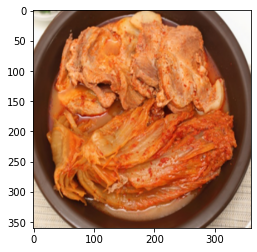

예측 : 미역국, 정답 : 미역국
일치


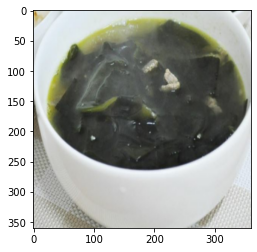

예측 : 매운탕, 정답 : 추어탕
불일치


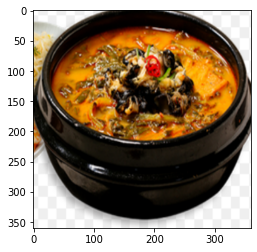

예측 : 갈비찜, 정답 : 갈비찜
일치


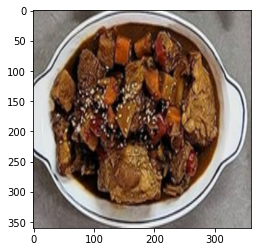

예측 : 라볶이, 정답 : 라볶이
일치


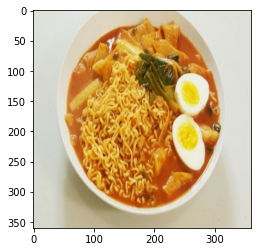

예측 : 추어탕, 정답 : 추어탕
일치


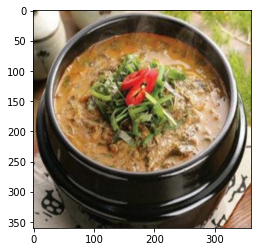

예측 : 짬뽕, 정답 : 짬뽕
일치


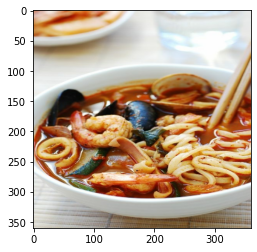

예측 : 양념치킨, 정답 : 양념게장
불일치


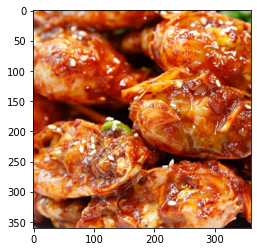

예측 : 동태찌개, 정답 : 된장찌개
불일치


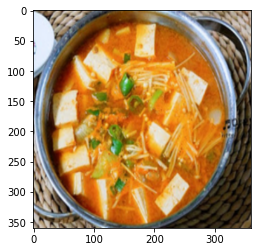

예측 : 수정과, 정답 : 수정과
일치


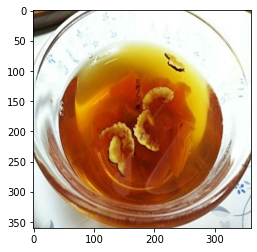

예측 : 송편, 정답 : 송편
일치


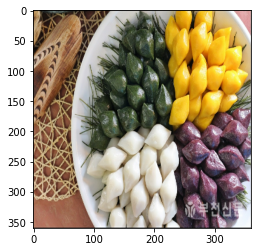

예측 : 계란후라이, 정답 : 계란후라이
일치


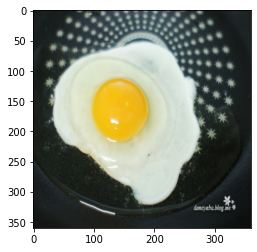

예측 : 북엇국, 정답 : 계란국
불일치


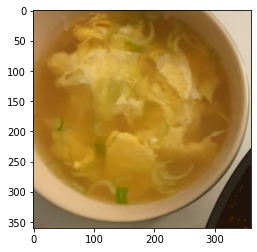

예측 : 쫄면, 정답 : 쫄면
일치


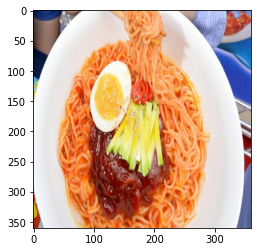

예측 : 파전, 정답 : 파전
일치


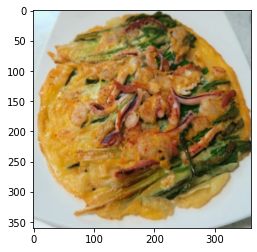

예측 : 산낙지, 정답 : 산낙지
일치


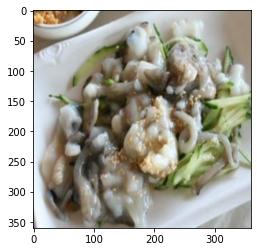

예측 : 삼겹살, 정답 : 곱창구이
불일치


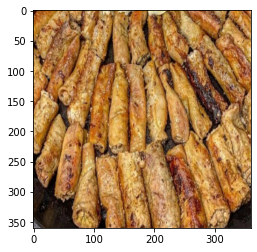

예측 : 조개구이, 정답 : 조개구이
일치


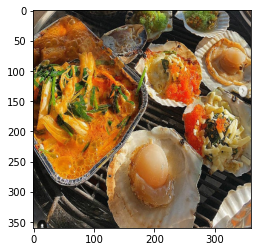

예측 : 조개구이, 정답 : 조개구이
일치


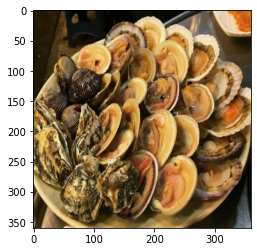

예측 : 추어탕, 정답 : 추어탕
일치


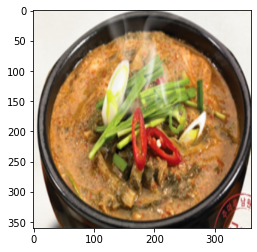

예측 : 갈비탕, 정답 : 시래기국
불일치


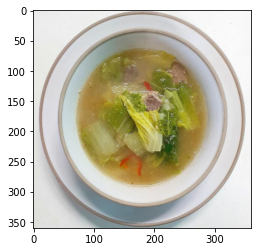

예측 : 주먹밥, 정답 : 떡국_만두국
불일치


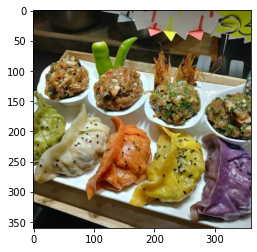

예측 : 갈비탕, 정답 : 갈비탕
일치


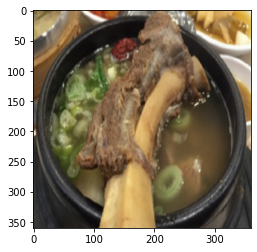

예측 : 해물찜, 정답 : 해물찜
일치


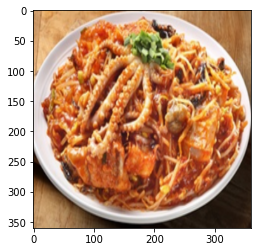

예측 : 쫄면, 정답 : 쫄면
일치


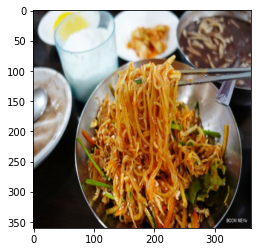

예측 : 콩국수, 정답 : 콩국수
일치


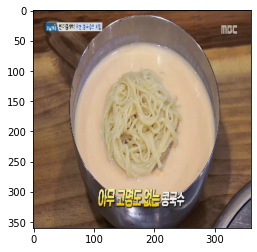

예측 : 수육, 정답 : 수육
일치


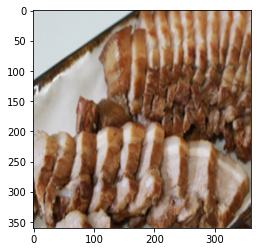

예측 : 감자탕, 정답 : 감자탕
일치


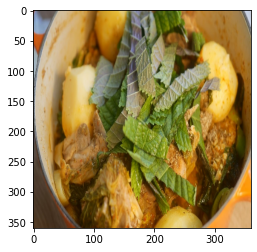

예측 : 갈비탕, 정답 : 감자탕
불일치


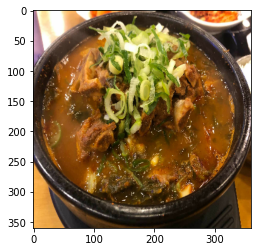

예측 : 떡볶이, 정답 : 떡볶이
일치


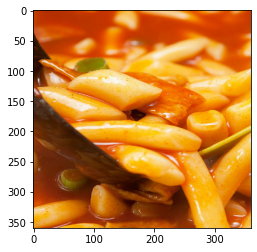


정확도 : 73.33%


In [ ]:
predict_test(model, test_img_paths, is_visual=True, is_choice=True)


In [ ]:
def process_data()

In [ ]:
test_ds = tf.data.Dataset.from_tensor_slices(test_img_paths)
tmp = next(iter(test_ds))

In [ ]:
tf.strings.unicode_transcode(tmp, input_encoding="UTF-8", output_encoding="x-8")


<tf.Tensor: shape=(), dtype=string, numpy=b'/content/drive/Shareddrives/GOFOODA/data/test_image/target/\xe1\x84\x80\xe1\x85\xa1\xe1\x86\xab\xe1\x84\x8c\xe1\x85\xa1\xe1\x86\xbc\xe1\x84\x80\xe1\x85\xa6\xe1\x84\x8c\xe1\x85\xa1\xe1\x86\xbc_0/\xe1\x84\x80\xe1\x85\xa1\xe1\x86\xab\xe1\x84\x8c\xe1\x85\xa1\xe1\x86\xbc\xe1\x84\x80\xe1\x85\xa6\xe1\x84\x8c\xe1\x85\xa1\xe1\x86\xbc_1.jpg'>